In [14]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import glob
import tensorflow as tf
import pandas as pd
from skimage import io
import h5py
from sklearn import cluster
from skimage import transform
from scipy.spatial.distance import pdist, squareform
import igraph as ig
import louvain
from sklearn.preprocessing import StandardScaler



In [2]:
import utils2
from pixel_per_atom import ppa

In [3]:
# restart kernal if this code doesn't work --> need to run this first to be in interactive mode
file = "dat_test_small.tif"
avg_distance = ppa.atom_distance(file, num_iteration= 3, box_size= 200)

Distance between atoms (pixels):  31.668560364501158
Distance between atoms (pixels):  32.69222395453078
Distance between atoms (pixels):  37.54101097608757
average distance between atoms (pixels):  33.96726509837317
Image is about  30.1  atoms tall and  30.1  atoms across


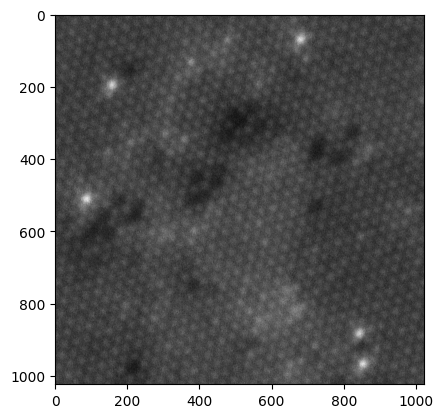

In [16]:
%matplotlib inline
file = "dat_test_small.tif"
image = Image.open(file)

# define parameters
image_size = (1024, 1024)  # Replace with desired width and height
patch_size = (64, 64) # must be a divisor of image height/width
overlapping = False  # only option - ADD TRUE eventually
embedding_type = "image_net"  # only option rn -- ADD MICRONET eventually
cluster_type = "louvain" # options are louvain or agglo


# resize image to image_size parameter + plot
image = image.resize(image_size, Image.LANCZOS)
plt.imshow(np.array(image), cmap=cm.gray)
plt.show()

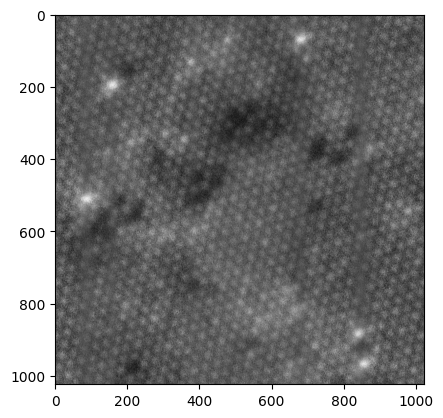

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.array(image))
plt.imshow(np.array(scaled_data), cmap=cm.gray)
plt.show()
scaled_image = Image.fromarray(scaled_data)


In [5]:
a = round(patch_size[0]/avg_distance, 2)
b = round(patch_size[1]/avg_distance, 2)
print(a*b, " atoms per patch (on average)")

3.5343999999999998  atoms per patch (on average)


making patch size (64, 64)
embedding using image_net
Number of rows:  16
Number of columns:  16
clustering using louvain
Clustering individual modalities using cutoff=0.7


c:\Users\gguinan\Desktop\code\graphing\new stuff 9_24\utils2.py:183: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chip_df = chip_df.replace({"chip ID": d}).sort_values(by=['chip ID'])


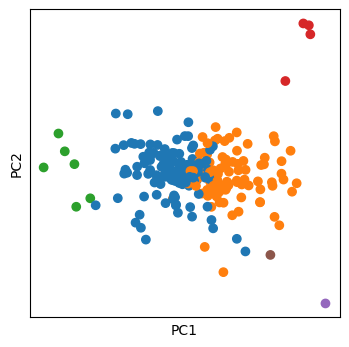

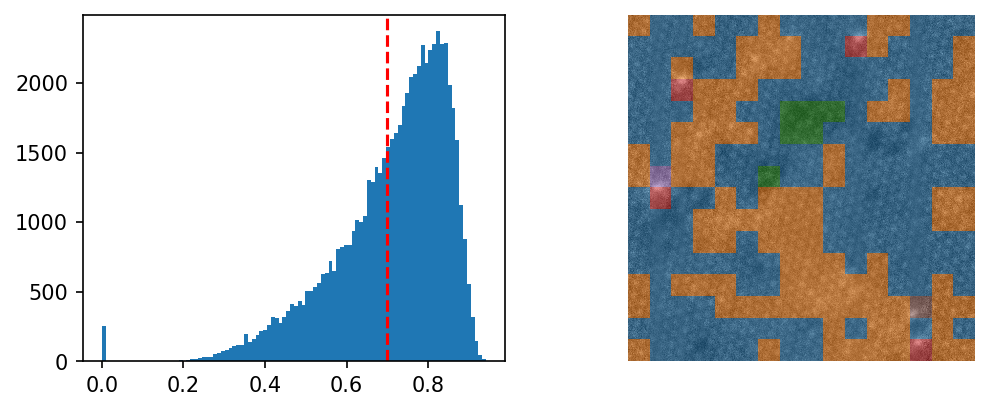

In [20]:
utils2.graph(scaled_image, patch_size, overlapping, embedding_type, cluster_type, cutoff = .7)

making patch size (64, 64)
embedding using image_net
Number of rows:  16
Number of columns:  16
clustering using louvain
Clustering individual modalities using cutoff=0.75


c:\Users\gguinan\Desktop\code\graphing\new stuff 9_24\utils2.py:183: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chip_df = chip_df.replace({"chip ID": d}).sort_values(by=['chip ID'])


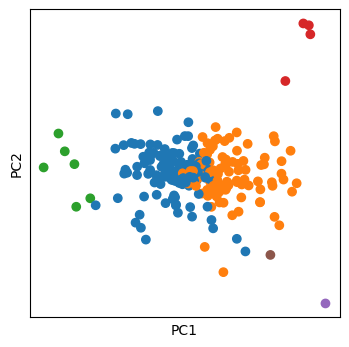

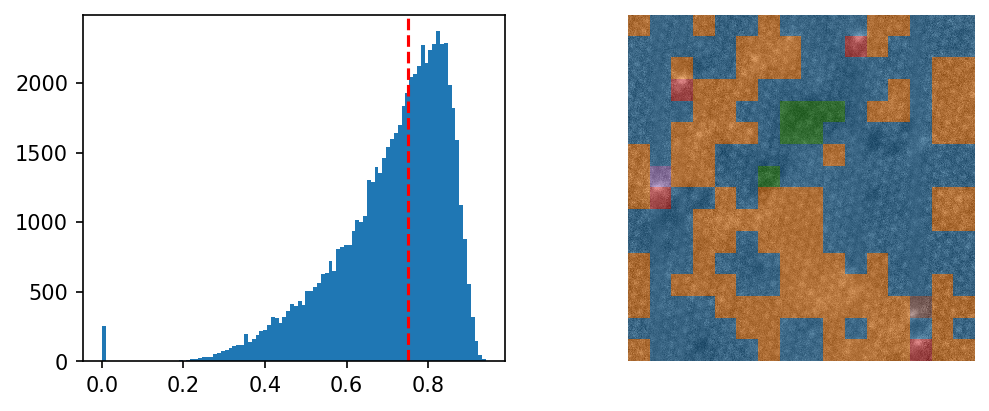

In [22]:
utils2.graph(scaled_image, patch_size, overlapping, embedding_type, cluster_type, cutoff = .75)

making patch size (64, 64)
embedding using image_net
Number of rows:  16
Number of columns:  16
clustering using louvain
Clustering individual modalities using cutoff=0.78


c:\Users\gguinan\Desktop\code\graphing\new stuff 9_24\utils2.py:183: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chip_df = chip_df.replace({"chip ID": d}).sort_values(by=['chip ID'])


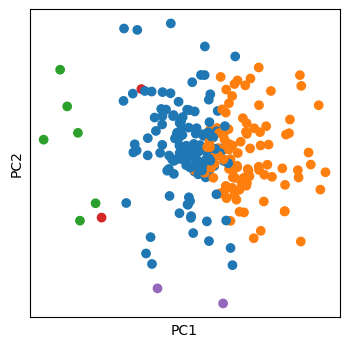

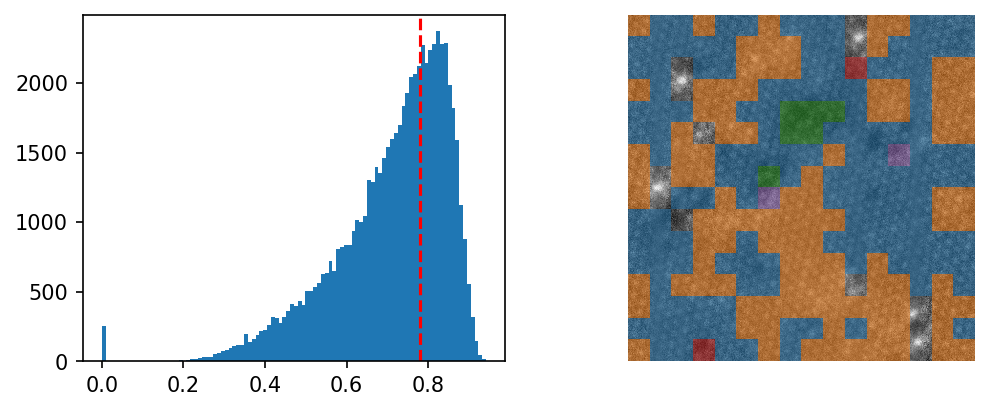

In [24]:
utils2.graph(scaled_image, patch_size, overlapping, embedding_type, cluster_type, cutoff = .78)

making patch size (64, 64)
embedding using image_net
Number of rows:  16
Number of columns:  16
clustering using agglo
number of clusters: 3


c:\Users\gguinan\Desktop\code\graphing\new stuff 9_24\utils2.py:183: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chip_df = chip_df.replace({"chip ID": d}).sort_values(by=['chip ID'])


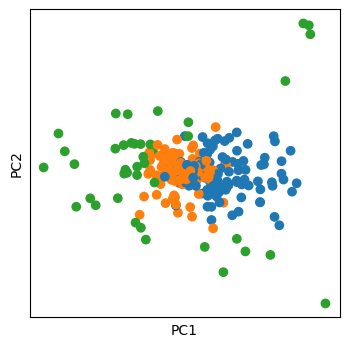

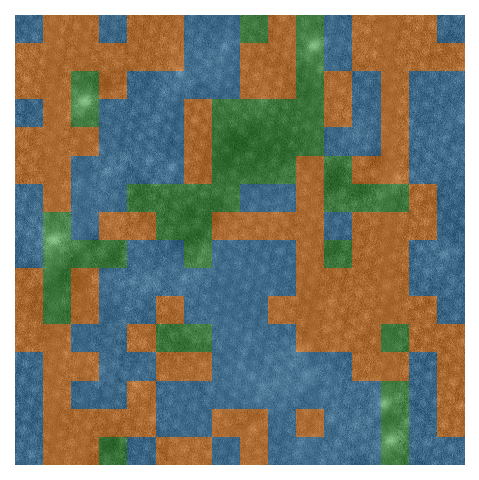

In [25]:
cluster_type = "agglo"
utils2.graph(scaled_image, patch_size, overlapping, embedding_type, cluster_type)

making patch size (64, 64)
embedding using image_net
Number of rows:  16
Number of columns:  16
clustering using agglo
number of clusters: 4


c:\Users\gguinan\Desktop\code\graphing\new stuff 9_24\utils2.py:183: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chip_df = chip_df.replace({"chip ID": d}).sort_values(by=['chip ID'])


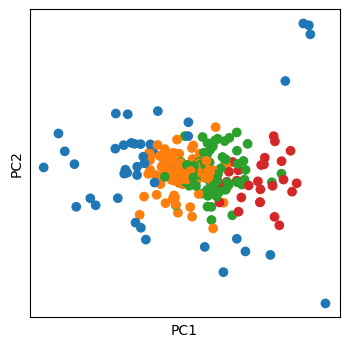

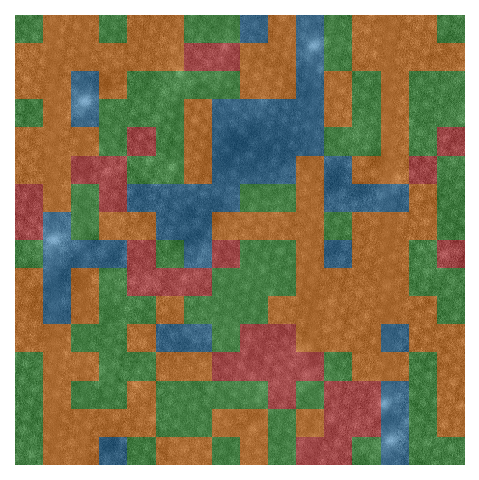

In [26]:
cluster_type = "agglo"
utils2.graph(scaled_image, patch_size, overlapping, embedding_type, cluster_type, nclusters = 4)

making patch size (64, 64)
embedding using image_net
Number of rows:  16
Number of columns:  16
clustering using agglo
number of clusters: 5


c:\Users\gguinan\Desktop\code\graphing\new stuff 9_24\utils2.py:183: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chip_df = chip_df.replace({"chip ID": d}).sort_values(by=['chip ID'])


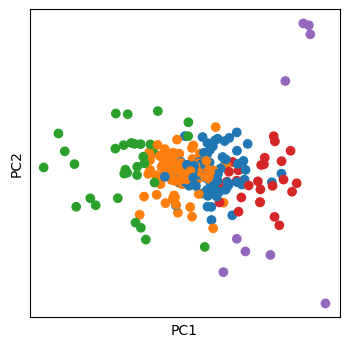

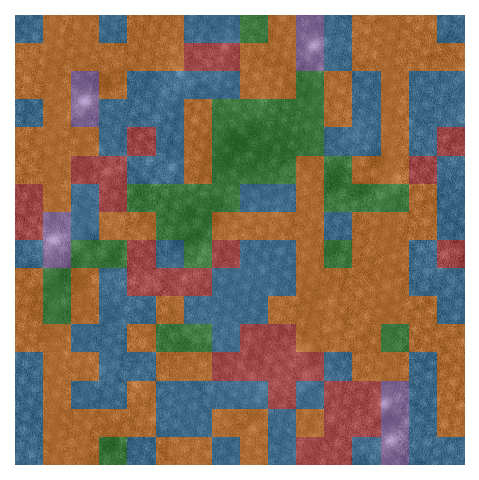

In [27]:
cluster_type = "agglo"
utils2.graph(scaled_image, patch_size, overlapping, embedding_type, cluster_type, nclusters = 5)

making patch size (64, 64)
embedding using image_net
Number of rows:  16
Number of columns:  16
clustering using agglo
number of clusters: 2


c:\Users\gguinan\Desktop\code\graphing\new stuff 9_24\utils2.py:183: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chip_df = chip_df.replace({"chip ID": d}).sort_values(by=['chip ID'])


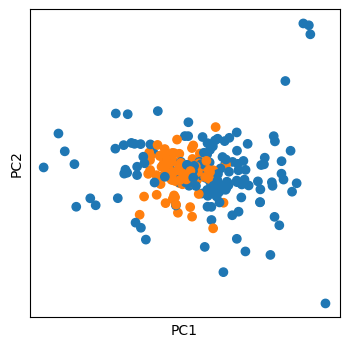

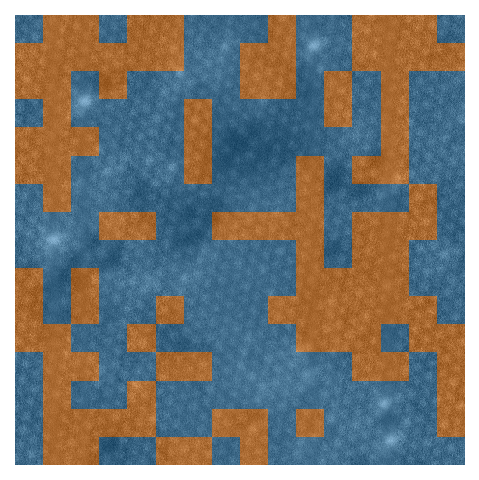

In [30]:
cluster_type = "agglo"
utils2.graph(scaled_image, patch_size, overlapping, embedding_type, cluster_type, nclusters = 2)